
# 1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+q)^3(1- q\right)^3 &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as scm

In [ ]:
#Consideremos un h de tamaño 5

h = 5
Q0 = np.linspace(-1,10,100)

#Definimos el alpha_d para dos dimensiones

alpha_d = 5/(np.pi*h**2)
#w_ad = lambda q: alpha_d*[(1+q)(1-q)]**3

def w_ad(Q0):
    
    W=np.zeros(len(Q0))
    
    for i in np.arange(len(Q0)):
        if Q0[i]>=0 and Q0[i]<h:
            W[i]=(-alpha_d*( Q0[i]**6 - 3*Q0[i]**4 + 3*Q0[i]**2 - 1))
    else:
        W[i]=0
    return W

In [ ]:
# Grafiquemos ahora el Kernell de Lucy, en el intervalo de 0

plt.plot(Q0,w_ad(Q0))
plt.title("Lucy's Quartic Kernel",size=14)
plt.xlabel('q',size=12)
plt.ylabel('W(R,h)',size=12)

2. Encontrar la derivada empleanda la libreria simbolica.
**Solución:** \
Para encontrar la derivada simbólica usamos la librería sympy, luego transformamos la expresión symbólica a una numérica de Numpy.

In [28]:
# Importemos sympy y coloquemos las variables sobre la que queremos derivar

import sympy as sy
%matplotlib inline

q, 𝛼  = sy.symbols('q 𝛼')

W = lambda q: 𝛼 * ( 1 - 3*q**2 + 3*q**4 - q**6 )

In [29]:
# Encontremos la derivada simbólica que depende de 𝛼 y q, pero 𝛼 es constante

dW = sy.diff(W(q),q)
sy.init_printing()
dW

/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDep

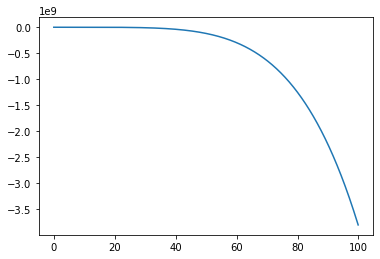

In [30]:
# Grafiquemos la derivada en el intervalo 0 <= q < h
# Puesto que como la función es polinomial de nada nos sirve graficar en donde la función siempre se hace 0

Q1 = np.arange(0,h,0.1)
num = sy.lambdify([q,𝛼],dW)
DW = num(Q1,alpha_d)

plt.plot(Q1,DW)

3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1.

**Solución:**

Usando el intervalo de valores de 'q' entre 0 y h, además de la función de scipy.misc derivative, podemos determinar el valor de la derivada en cada punto del intervalo de 'q'.

In [31]:
NumDW = np.zeros(len(Q1))
W_R = lambda q : alpha_d*( 1 - 3*q**2 + 3*q**4 - q**6 )

for i in range(len(Q1)):
    NumDW[i] = scm.derivative(W_R,Q1[i],dx=1e-6)

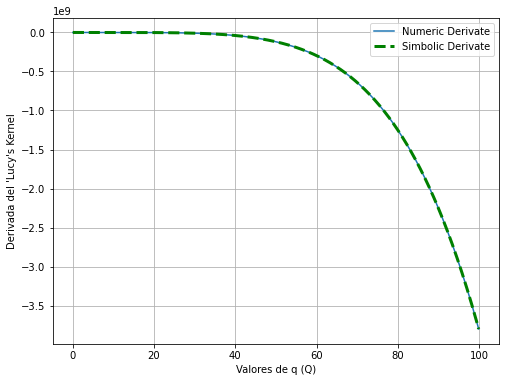

In [32]:
plt.figure(figsize=(8,6))
plt.plot(Q1,NumDW,label='Numeric Derivate')
plt.plot(Q1,DW,'g--',label='Simbolic Derivate',linewidth=3)
plt.xlabel("Valores de q (Q)")
plt.ylabel("Derivada del 'Lucy's Kernel")
plt.legend()
plt.grid()

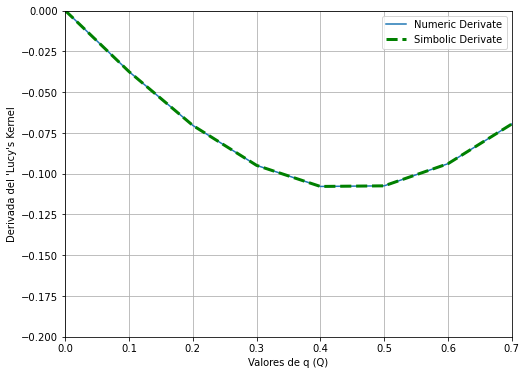

In [33]:
plt.figure(figsize=(8,6))
plt.plot(Q1,NumDW,label='Numeric Derivate')
plt.plot(Q1,DW,'g--',label='Simbolic Derivate',linewidth=3)
plt.ylim(-0.2,0)
plt.xlim(0,0.7)
plt.xlabel("Valores de q (Q)")
plt.ylabel("Derivada del 'Lucy's Kernel")
plt.legend()
plt.grid()

In [34]:
print(alpha_d)

0.06366197723675814


Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.

Al hacer la comparación con lápiz y papel, y al considerar el $\alpha$ anterior, tenemos por ejemplo que para $q=0.5$ tenemos un valor de $\approx -0.11936$

Mientras que los valores hallados simbólicamente y numéricamente en el PC corresponden en su orden a:

In [35]:
print("simbólicamete", num(0.5,alpha_d))
print("numéricamente", scm.derivative(W_R,0.5,dx=1e-6))

simbólicamete -0.10742958658702935
numéricamente -0.10742958658424562


# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del Trapecio.
**Solución:**
    
Sabemos que si usamos el método del trapecio para dos puntos ($x_0$, $x_1$) entonces el área bajo la curva que forma la función que queremos integrar estará dada por:

$$ A = (x_1-x_0)f(x_0)+\frac{x_1-x_0}{2}(f(x_1)-f(x_0)) $$

Por lo tanto, si tomamos una cantidad 'n' de puntos entonces esta área que corresponde al valor de la integral estará dada por:

$$\int_{a}^{b}  \ f(x) \ dx = \sum_{i=0}^{n-1} \ \left  [(x_{i+1}-x_i)f(x_i)+\frac{x_{i+1}-x_i}{2}(f(x_{i+1})-f(x_i)) \ \right ] $$

Ahora bien, sabemos que para obtener un mejor valor de la integral por este método hacemos 'n' particiones del dominio de la función; pero por la necesidad de ssacar un punto medio entre estos podemos establecer el valor de h como $h = \frac{b-a}{2n}$

$$\int_{a}^{b}  \ f(x) \ dx = \sum_{i=0}^{n-1} \ \left  [h\ f(x_i)+\frac{h}{2}[f(x_{i+1}) - f(x_i)] \ \right ] = \sum_{i=0}^{n-1} \ \left  [\frac{h}{2}[ f(x_i)+f(x_{i+1})] \ \right ] $$


2. Escribir en código Markdown la expresión para calcular una integral con la regla de Simpson.

**Solución:**

Considerando el método de integración numérica de la regla de Simpson sabemos que si tomamos tres puntos, de los cuales uno es el intermedio del otro, así, el valor entre los puntos está dado por $x_1 = x_0 + h,\ h=\frac{b-a}{2}$. Y el área bajo la curva estará dada por:

$$ \int_{x_0}^{x_2} \ f(x) \ dx = \frac{h}{3}[f(x_0)+4f(x_1)+f(x2)] $$

Donde $x_1$ es el punto medio y $x_2$ el punto final de la integral.

Por lo tanto, si tomamos una cantidad 'n' de puntos entonces esta área que corresponde al valor de la integral estará dada por:

$$\int_{a}^{b}  \ f(x) \ dx = \sum_{i=0}^{n-1} \ \left  [(x_{i+1}-x_i)f(x_i)+\frac{x_{i+1}-x_i}{2}(f(x_{i+1})-f(x_i)) \ \right ] $$
$$ = \sum_{i=0}^{n-1} \frac{1}{2}\ \left  [(x_{i+1}-x_i)f(x_i)+(x_{i+1}-x_i)(f(x_{i+1}) \ \right ] $$

$$ = \sum_{i=0}^{n-1} \frac{ x_{i+1} - x_i }{2}\ [ f(x_i)+(f(x_{i+1}) ] $$

3. Calcular  una aproximación de las siguientes integrales  con los metodo 1,2 garantizando que el error sea menor a $\varepsilon=1E-5$. 

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$

**Solución**

Puesto que vamos a usar los métodos de las librerías de scipy, entonces necesitamos convertir la función dada en forma simbólica a un conjunto de puntos en el valor de $f(x)=y$, así, para nuestra función $e^{1-\sqrt{x}}$, en el intervalo $I = [0,\pi ]$ tenemos:

In [36]:
import scipy.integrate as scin

X = np.arange(0,np.pi+0.01,0.01)
fx = lambda x: np.exp(1-x**(1/2))
Y = fx(X)

# Integramos usando el método del trapezoide con la función traída de scipy, tenemos:

Itrap = scin.trapezoid(Y,X)
print("Usando el método del trapezoide:", Itrap)

# Integramos por el método de Simpson:

Isims = scin.simpson(Y,X)
print("Usando el método del simpson:", Isims)

Usando el método del trapezoide: 2.8799225080144932
Usando el método del simpson: 2.8797080265662682


In [37]:
# Ahora, intentemos econtrar el valor de la derivada usando la librería sympy

import math as mt
import sympy as sy
%matplotlib inline

x = sy.Symbol('x')

f_x = sy.E ** (1 - sy.sqrt(x))

Isimb = sy.integrate(f_x,x)
sy.simplify(Isimb)

/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/harold/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDep

In [38]:
I_ind = sy.lambdify(x, Isimb, 'numpy')
Ival = I_ind(np.pi) - I_ind(0)
print(Ival)

2.875491135437584


Además, al hacer la integral en Wolfram obtenemos la integral definida como:

$$ \int_{0}^{\pi} e^{1-\sqrt{x}} dx = 2e\ \left (1-e^{-\sqrt{\pi}} \left (1+\sqrt{\pi}\right)\right ) \approx 2.8755$$

- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$
 
Puesto que la función a integrar no está definida en el punto extremo izquiero $x=0$, entonces usando el método de solución de integrales con singularidades en el extremo izquierdo y dividiendo la integral en dos partes, tenemos:

$$ \int_{0}^{\pi/2} \frac{1}{\sqrt{tan(x)}} = \int_{0}^{\pi/4} \frac{1}{\sqrt{tan(x)}} + \int_{\pi/4}^{\pi/2} \frac{1}{\sqrt{tan(x)}} $$

Usando la aproximación que mencionamos para singularidades de extremo izquierdo tenemos, que:

$$t = tan(x)  \Longrightarrow si \ x=0 \Rightarrow t = 0 \ y \ si \ x=\frac{\pi}{4} \Rightarrow t = 1 $$

$$ \int_{0}^{\pi/4} \frac{1}{\sqrt{tan(x)}} = \int_{0}^{1} \frac{1}{\sqrt{x)}} \cdot \frac{1}{1+t^2} dt $$

$$ \int_{0}^{\pi/4} \frac{1}{\sqrt{tan(x)}} = \int_{0}^{1} \frac{G(t)}{\sqrt{t}} dt + \int_{0}^{1} \frac{P_4(t)}{\sqrt{t}} dt$$

Donde $G(t)$ es una función por partes que depende de la función en términos de t y el cuarto polinomio de Taylor para esta función, de la siguiente manera:

$$ G(t)=  \left\{
\begin{array}{ll}
      g(t) - P_4(t) ,& 0<t\leq 1 \\
      0 ,& t=0 \\
\end{array} 
\right. $$ 

$$ g(t) = \frac{1}{1+t^2} $$

$$ P_4(t) = g(0) + g'(0)t + \frac{g''(0)t^2}{2!} + \frac{g'''(0)t^3}{3!} + \frac{g^(4)(0)t^4}{4!}$$ 

In [39]:
t  = sy.symbols('t')

g = lambda t: 1/(1+t**2)

der1 = sy.lambdify(t, sy.diff(g(t),t), 'numpy')
der2 = sy.lambdify(t, sy.diff(g(t),t,2), 'numpy')
der3 = sy.lambdify(t, sy.diff(g(t),t,3), 'numpy')
der4 = sy.lambdify(t, sy.diff(g(t),t,4), 'numpy')

def P4(t):
    d1 = der1(0)*t
    d2 = der2(0)*t**2/mt.factorial(2)
    d3 = der3(0)*t**3/mt.factorial(3)
    d4 = der4(0)*t**4/mt.factorial(4)
    return g(0)+d1+d2+d3+d4

def G_(t):
    if t!=0:
        G = g(t) - P4(t)
    else:
        G = 0
    return G

Ahora bien, con la intención de evitar el error de evaluar la función en $t=0$, definamos las funciones a integrar como $F1(t)= \frac{G(t)}{\sqrt{t}}$ y $F2(t)= \frac{P_4(t)}{\sqrt{t}}$:

In [40]:
T = np.linspace(0,1,100)
Y1 = np.zeros(len(T))
Y2 = np.zeros(len(T))

def F1_(t):
    if t!=0:
        F1 = G_(t)/np.sqrt(t)
    else:
        F1 = 0
    return F1

def F2_(t):
    if t!=0:
        F2 = P4(t)/np.sqrt(t)
    else:
        F2 = 0
    return F2

for i in range(len(T)):
    Y1[i] = F1_(T[i])
    Y2[i] = F2_(T[i])

Ahora, podemos integrar numéricamente los valores de T,(Y1,Y2) aplicando la fórmula considera anteriormente.

In [41]:
scin.trapezoid(Y1,T)

Del resultado anterior vemos que la integral que nos aporta $$ \frac{G(t) - P4(t)}{\sqrt{t}}$$

In [42]:
# Integramos por el mértodo de trapezoide:

Itrap1 = scin.trapezoid(Y1,T)
Itrap2 = scin.trapezoid(Y2,T)
print(Itrap2)
# Integramos por el método de Simpson:

Isims1 = scin.simpson(Y1,T)
Isims2 = scin.simpson(Y2,T)
print(Isims2)
# Sabemos ahora, que la integral en total está dada por la suma de las dos integrales de F1 y F2, luego:

print("Usando el método del trapezoide:", Itrap1+Itrap2)
print("Usando el método del simpson:", Isims1+Isims2)

1.6754640866921386
1.683826167636141
Usando el método del trapezoide: 1.5871687086575366
Usando el método del simpson: 1.595549605689727


Ahora bien, para calcular el valor de la otra parte de la integral, y para evitar que se produzca la indeterminación al evaluar x=0 en la función, usamos la identidad trignométrica que escribe la tangente en términos del seno y el coseno, luego obtenemos:

$$ \int_{\pi/4}^{\pi/2} \frac{1}{\sqrt{tan(x)}} \ dx = \int_{\pi/4}^{\pi/2} \frac{\sqrt{cos(x)}}{\sqrt{sin(x)}} \ dx $$

In [43]:
def F_(x):
    return np.sqrt(np.cos(x)/np.sin(x))

h = 100
Xa = np.linspace(np.pi/4,np.pi/2,h)
Ya = F_(Xa)

In [44]:
# Integramos por el mértodo de trapezoide:

Itrap3 = scin.trapezoid(Ya,Xa)

# Integramos por el método de Simpson:

Isims3 = scin.simpson(Ya,Xa)

# Sabemos ahora, que la integral en total está dada por la suma de las dos integrales de F1 y F2, luego:

ItrapT = Itrap1+Itrap2+Itrap3
IsimsT = Isims1+Isims2+Isims3
print("Usando el método del trapezoide:", ItrapT)
print("Usando el método del simpson:", IsimsT)

Usando el método del trapezoide: 2.0745225526670925
Usando el método del simpson: 2.0829571105244016


**Finalmente:** Usando Wolfram obtenemos que:

$$ \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx = \frac{\pi}{\sqrt{2}} \approx 2.2214$$

Esta integral no es evaluada en sympy, por lo que escribirla en Wolfram resultó la opción más viable

- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dydx
 $$

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [46]:
# Definimos la función de dos variables:

def f(x,y):
    return 2*y*np.sin(x)+np.cos(x)**2

# Definimos las funciones que corresponden a los límites de integración para y
def r(x):
    return np.sin(x)

def s(x):
    return np.cos(x)

In [47]:
# Definimos la función de integración por trapezoide para que se adapte a nuestro método:

def Trapezoid(f,a,b,Ns):
    if Ns==0:
        return 0
    
    else:

        #Ns: Numero de intervalos
        x=np.linspace(a,b,Ns+1)

    
        h=x[1]-x[0]
        suma=h/2*(f(x[0])+f(x[Ns]))
    
        for j in range(1,Ns-1 +1):
            suma+=h*f(x[j])

        return suma

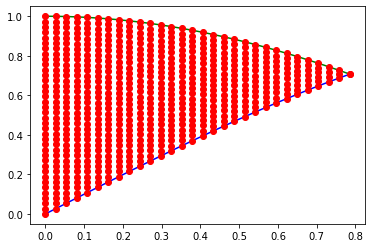

In [48]:
# Colocamos los límites de integración para 'x'
# Consideramos que sobre el plano XY se toman 30 particiones en el intervalo de x entre los punto a y b

a=0
b=np.pi/4
Nx=30

x=np.linspace(a,b,Nx)
hx=x[1]-x[0]

plt.plot(x,r(x),color='blue')
plt.plot(x,s(x),color='green')

# Obtenemos la gráfica de como aparecen las particiones del piso de nuestro volumen
# Donde cada área se halla mediante el método del trapezoide y luego se suman

for i in range(Nx):
    y=np.arange(r(x[i]),s(x[i])+hx,hx)
    Ny=len(y)
    y=np.linspace(r(x[i]),s(x[i]),Ny)
    xi=[x[i]]*Ny
    plt.plot(xi,y,'o--',color='red')

In [49]:
# Luego de obtener el valor del área bajo la curva con la integración anterior nos resulta una función F(x)

def F(x):
    
    def g(y):
        return f(x,y)
    
    y=np.arange(r(x),s(x)+hx,hx)
    Ny=len(y)

    return Trapezoid(g,r(x),s(x),Ny-1)

In [66]:
# Integramos nuevamente para hallar el volumen total

Fs=np.zeros(len(x))

for i in range(len(x)):
    Fs[i]=np.abs(F(x[i]))

print("El valor de la integral corresponde a:",Trapezoid(F,a,b,Nx))

El valor de la integral corresponde a: 0.5117234636377012


**Finalmente:**  Al hacer esta misma integral en Wolfram obtenemos:

$$ \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dydx \approx 0.511845$$

### - 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

**Solución:**
Dividiendo la integral en 3 partes para poder aplicar el cambio de variables en los valores de infinito, tenemos:

$$ \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx =
 \int_{-\infty}^{1} \frac{1}{1+x^2} \ dx + \int_{-1}^{1} \frac{1}{1+x^2} \ dx + \int_{1}^{\infty} \frac{1}{1+x^2} \ dx$$
 
Sabiendo que la función que integramos es par y puesto que el tamaño del intervalo negativo es igual al positivo, tenemos:

$$ \int_{-\infty}^{1} \frac{1}{1+x^2} \ dx =  \int_{1}^{\infty} \frac{1}{1+x^2} \ dx$$

Al hacer la sustitución $t=(x+1)^{-1}$ obtenemos:

$$ \int_{1}^{\infty} \frac{1}{1+x^2} \ dx = \int_{0}^{1} \frac{1}{1 + t^2} \ dt $$

In [82]:
# Realizamos simbólicamente la integral completa para obtener el valor real
import sympy as sy

x = sy.symbols('x')
%matplotlib inline

Ireal = sy.integrate( (1/(x**2+1) ),x)
Ireal

In [83]:
IrealV = sy.lambdify(t,Ireal)
#print(IrealV(1)) # Confirmamos que la función funciona

# Luego la integral definida corresponde a

Ireald = IrealV(np.Inf) - IrealV(np.NINF)
Ireald

Obtenemos que el valor esperado de la integral es el valor de $\pi$.

In [106]:
# Realizemos inicialmente la integral entre -1 y 1 (Integral 1)

Gx = lambda x: 1/(1+x**2)

N = 100
X = np.linspace(-1,1,N)
Y1 =  Gx(X)

In [107]:
I1s = scin.simpson(Y1,X)
I1t = scin.trapezoid(Y1,X)
print(I1t)
print(I1s)

1.5707623166599438
1.5707966702601486


In [115]:
# Realizemos ahora la integral con la sustitución y la multiplicamos por 2 (Integral 2)

Ft = lambda t: 1/(1+t**2)

def Inum2(N): #N número de puntos en el intervalo considerados
    T = np.linspace(0,1,N)
    Y = Ft(T)
    I2t = 2*scin.trapezoid(Y,T)
    I2s = 2*scin.simpson(Y,T)
    
    return I2t,I2s

erabS = 1
erabT = 1

In [123]:
while (erabS>1e-5 and erabT>1e-5):
    erabT = np.abs(Ireald - Inum2(N)[0] - I1t)
    erabS = np.abs(Ireald - Inum2(N)[1] - I1s)
    N = N*10
    
print(erabT,erabS)

3.401013496162619e-05 3.434652517952941e-07


In [121]:
# Así, al considerara mil valores de la partición tenemos el error querido con los dos métodos

print("Valor usando trapezoide:",Inum2(1000)[0] + I1t)
print("Valor usando simpson:",Inum2(1000)[1]+I1s )

Valor usando trapezoide: 3.14155855995459
Valor usando simpson: 3.1415929969296696


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$

In [128]:
# Definamos la función en términos de x

FLn = lambda x: 1/np.log(x)

X = np.linspace(np.exp(1),2*np.exp(1),1000)
Y = FLn(X)

Itrap = scin.trapezoid(Y,X,dx=1e-6)
Isims = scin.simpson(Y,X,dx=1e-6)


print("El valor de la integral usando trapezoide es:",Itrap)
print("El valor de la integral usando simpson es:",Isims)

El valor de la integral usando trapezoide es: 2.003810749013251
El valor de la integral usando simpson es: 2.0038105619858713


**Finalmente:** Usando Wolfram obtenemos que la integral es:

$$ \int_{e}^{2e} \frac{1}{\ln x} \, dx \approx 2.003810561624024 $$

In [129]:
Ireal = 2.003810561624024
ErrTrap = np.abs(Ireal-Itrap)
ErrSims = np.abs(Ireal-Isims)

print(ErrTrap,ErrSims)

1.8738922724637064e-07 3.618474408995098e-10


4. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity.

In [133]:
# Escribamos inicialmente los valores constantes a considerar

g = 9.8 #m/s^2
R = 6371000 #m

Para evitarnos complicaciones al definir a z, hagamos la integral usando a ésta como variable. Donde al realizar manualmente esta integral obtenemos:

$$\int_1^\infty z^{-2} dz = 1$$

Ahora bien, veamos que numéricamente obtenemos que:

In [134]:
f = lambda z: z**(-1)

Z = np.linspace(1,1e20,100)

Haciendo la sustitución $t=z^{-1}$, obtenemos que la integral se convierte en:

$$ \int_0^1 \frac{1}{t^{2-2}} = \int_0^1 dt = 1 $$

Por lo tanto, $v = \sqrt{2gR}$

In [135]:
v = np.sqrt(2*g*R)
print("Por lo tanto, el valor de escape es de:",v, "m/s.")

Por lo tanto, el valor de escape es de: 11174.596189572132 m/s.



6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

Realicemos la integral

In [138]:
# Definimos la función
f = lambda t: np.exp(-t)

# Colocamos el valor real de la integral de referencia
Ireal = 1 - np.exp(-1)

# Hacemos el arreglo de los valores
N = np.array([2,10,20,40,80,160])

# Hacemos el arreglo de errores asociados a cada método

Err_trap = np.zeros(len(N))
Err_sims = np.zeros(len(N))

# Colocamos un ciclo que llene estas funciones de error
# Por ahora solo consideramos trapecio y simpson

for i in range(len(N)):
    T = np.linspace(0,1,N[i])
    
    Itrap = scin.trapezoid(f(T),T)
    Err_trap[i] = np.abs((Itrap-Ireal)/Ireal)
    
    Isims = scin.simpson(f(T),T)
    Err_sims[i] = np.abs((Isims-Ireal)/Ireal)

In [167]:
# Hacemos el dataframe asociado

import pandas as pd

df = pd.DataFrame({"N":N, "𝜖_T":Err_trap, "𝜖_S":Err_sims})
df

,N,𝜖_T,𝜖_S
0,2,0.081977,8.197671e-02
1,10,0.001029,1.214802e-04
2,20,0.000231,1.303125e-05
3,40,0.000055,1.513477e-06
4,80,0.000013,1.824856e-07
5,160,0.000003,2.240700e-08


6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.

In [ ]:
from scipy.optimize import curve_fit

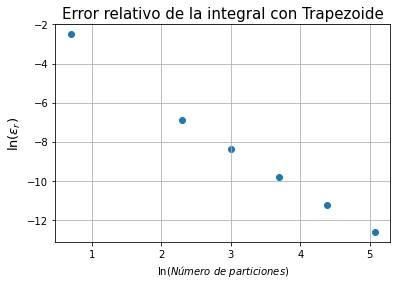

In [165]:
# Graficamos el error relativo vs. los posibles valores de N
# Sabiendo que se comportan como logaritmos, los linealizamos
# Para la integral por trapezoide

plt.scatter(np.log(N), np.log(Err_trap))
plt.title("Error relativo de la integral con Trapezoide",size=15)
plt.xlabel(r"$\ln ( Número \ de \ particiones )$")
plt.ylabel(r"$\ln(\epsilon_r)$",size =13)
plt.grid()

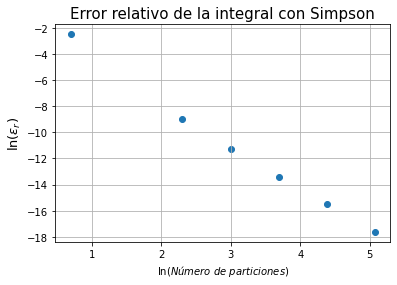

In [164]:
# Para la integral por simpson

plt.scatter(np.log(N), np.log(Err_sims))
plt.title("Error relativo de la integral con Simpson",size=15)
plt.xlabel(r"$\ln ( Número \ de \ particiones )$")
plt.ylabel(r"$\ln(\epsilon_r)$",size =13)
plt.grid()

In [181]:
from scipy.optimize import curve_fit

# Usemos los métodos de ajuste para obtener la pendiente e intercepto de la recta

x = np.log(N)
y1 = np.log(Err_trap)

# Definamos la función de una recta en general

def recta(x,a,b):
    return (a*x+b)

# Usemos curve_fit para obtener los valores de a y b
p_parT, p_errT = curve_fit(recta,x,y1)
p_parT

array([-2.28881077, -1.26850937])

In [187]:
# Donde estos valores corresponden a la pendiente y el intercepto respectivamente

a = p_parT[0]
b = p_parT[1]

print("Luego 𝜖_T =",b,"N^",a)

Luego 𝜖_T = -1.2685093736440067 N^ -2.2888107703114


In [188]:
x = np.log(N)
y2 = np.log(Err_sims)

p_parS, p_errS = curve_fit(recta,x,y1)

a_ = p_parS[0]
b_ = p_parS[1]

print("Luego 𝜖_S =",b_,"N^",a_)

Luego 𝜖_S = -1.2685093736440067 N^ -2.2888107703114
